In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from prepare_data import to_float

In [2]:
## Controlling plot aesthetics
plt.style.use('ggplot')
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['patch.facecolor'] = 'white';

In [3]:
df = pd.read_csv("data/California Purchases/PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv")

#### 0. Exploration

In [4]:
pd.set_option("display.max_columns", 50)

In [5]:
df.sample(5)

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,Supplier Name,Supplier Qualifications,Supplier Zip Code,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
71822,09/04/2013,08/30/2013,2013-2014,NaN,0252-2013,NaN,NON-IT Goods,NaN,SB/DVBE Option,NaN,California Emergency Management Agency,1037847.0,Sandy's Communications,CA-MB CA-SB CA-SBE,91395,NO,MOUNTING PIPE,.,1.0,$465.00,$465.00,43221705,43221705.0,Radio access equipment,43221700.0,Fixed network equipment and components,43220000.0,Data Voice or Multimedia Network Equipment or ...,43000000.0,Information Technology Broadcasting and Teleco...,"91395\n(34.257198, -118.466103)"
320291,07/02/2012,07/01/2012,2012-2013,1-11-89-58,4500141640,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,"Corrections and Rehabilitation, Department of",1729526.0,ABC Ventures LLC,CA-SB,94583,NO,"RICE, WHITE","RICE, WHITE",150.0,$21.15,$3172.50,50192603,50192603.0,Shelf stable prepared potatoes or rice or past...,50192600.0,Prepared side dishes,50190000.0,Prepared and preserved foods,50000000.0,Food Beverage and Tobacco Products,"94583\n(37.755754, -121.963415)"
218761,07/12/2012,05/16/2012,2012-2013,NaN,HSR09-09 #1,NaN,NON-IT Services,Consulting Services,Formal Competitive,NaN,"High Speed Rail Authority, California",1040238.0,T.Y. Lin International,NaN,94105,NO,Oversight of the PMT's work as it relates to t...,The Consultant will provide high level service...,1.0,$10000000.00,$10000000.00,80101601\n80101604\n80101603\n80101602,80101601.0,Feasibility studies or screening of project ideas,80101600.0,Project management,80100000.0,Management advisory services,80000000.0,Management and Business Professionals and Admi...,"94105\n(37.788667, -122.394444)"
76379,10/22/2013,10/16/2013,2013-2014,NaN,13-10085,NaN,NON-IT Services,Emergency Contract,Emergency Purchase,NaN,"State Hospitals, Department of",1758332.0,Affiliated Pathologists of the Central Coast,NaN,NaN,NO,Emergency Physician Services,Contractor performed emergency surgical pathol...,1.0,$163.59,$163.59,85121609,85121609.0,Surgery services,85121600.0,Medical doctors specialist services,85120000.0,Medical practice,85000000.0,Healthcare Services,NaN
32661,01/08/2013,01/01/2011,2012-2013,NaN,11B-5721,NaN,NON-IT Services,Subvention and Local Assistance,Services are specifically exempt by statute,NaN,"Community Services and Development, Department of",1122503.0,"Community Action Partnership of Madera County,...",NaN,93637,NO,Low Income Home Energy Assistance Program,Contractor agrees to provide Low-Income Home E...,1.0,$305520.00,$305520.00,83101902,83101902.0,Energy use reduction measures,83101900.0,Energy conservation,83100000.0,Utilities,83000000.0,Public Utilities and Public Sector Related Ser...,"93637\n(36.924059, -120.128145)"


#### Q1. What is the structure of the data in the data set?

The dataset contains California state's purchase orders.
- It contains $346018$ rows (purchase orders) and $31$ columns. 
- The datatypes of all columns, as inferred by Pandas, is either object or float64.
- Some of the inferred datatypes (e.g. for *Unit Price* and *Total Price* columns) are incorrect, so the corresponding columns need to be corrected before we can start analyzing the data.

In [6]:
df.shape

(346018, 31)

In [7]:
df.columns

Index(['Creation Date', 'Purchase Date', 'Fiscal Year', 'LPA Number',
       'Purchase Order Number', 'Requisition Number', 'Acquisition Type',
       'Sub-Acquisition Type', 'Acquisition Method', 'Sub-Acquisition Method',
       'Department Name', 'Supplier Code', 'Supplier Name',
       'Supplier Qualifications', 'Supplier Zip Code', 'CalCard', 'Item Name',
       'Item Description', 'Quantity', 'Unit Price', 'Total Price',
       'Classification Codes', 'Normalized UNSPSC', 'Commodity Title', 'Class',
       'Class Title', 'Family', 'Family Title', 'Segment', 'Segment Title',
       'Location'],
      dtype='object')

In [8]:
df.dtypes

Creation Date               object
Purchase Date               object
Fiscal Year                 object
LPA Number                  object
Purchase Order Number       object
Requisition Number          object
Acquisition Type            object
Sub-Acquisition Type        object
Acquisition Method          object
Sub-Acquisition Method      object
Department Name             object
Supplier Code              float64
Supplier Name               object
Supplier Qualifications     object
Supplier Zip Code           object
CalCard                     object
Item Name                   object
Item Description            object
Quantity                   float64
Unit Price                  object
Total Price                 object
Classification Codes        object
Normalized UNSPSC          float64
Commodity Title             object
Class                      float64
Class Title                 object
Family                     float64
Family Title                object
Segment             

In [9]:
df["Total Price Numeric"] = df["Total Price"].apply(to_float)

In [10]:
df["Unit Price Numeric"] = df["Unit Price"].apply(to_float)

#### Q2. Do any columns in the data set make the most sense to be encoded into labels for better statistical analysis?

Number of unique values in the acquisition-related nominal columns:
- Acquisition Type -> $5$
- Acquisition Method -> $20$
- Sub-Acquisition Method -> $17$

In [11]:
df["Acquisition Type"].unique()

array(['IT Goods', 'NON-IT Goods', 'IT Services', 'NON-IT Services',
       'IT Telecommunications'], dtype=object)

In [12]:
print(df["Sub-Acquisition Type"].unique().shape)
df["Sub-Acquisition Type"].unique()

(26,)


array([nan, 'Personal Services', 'Legal Services', 'Consulting Services',
       'Public Works', 'Interagency Agreements',
       'Services are specifically exempt by statute',
       'Nonprofit Organizations', 'Memberships', 'Joint Power Agreement',
       'Emergency Contract',
       'Agreements with other governmental entities and public universities',
       'Expert Witneses', 'Subvention and Local Assistance',
       'UC, CSU, Community Colleges, and foundations / auxiliaries',
       'Elevator Maintenance', 'Convention and Conference Services',
       'Architectural and Engineering', 'Printing Services',
       'Contracts with Local Governments', 'Contracting for Students',
       'Fiscal Intermediaries', 'Federally Funded',
       'Hazardous Activities', 'Revenue Agreements',
       'Commercial Office Moving Services'], dtype=object)

In [13]:
print(df["Acquisition Method"].unique().shape)
df["Acquisition Method"].unique()

(20,)


array(['WSCA/Coop', 'Informal Competitive', 'Statewide Contract',
       'Services are specifically exempt by statute', 'SB/DVBE Option',
       'NCB', 'Formal Competitive', 'Fair and Reasonable',
       'State Programs', 'Services are specifically exempt by policy',
       'CMAS', 'LCB', 'Master Purchase/Price Agreement',
       'Master Service Agreement', 'Emergency Purchase', 'CRP',
       'Software License Program', 'Special Category Request (SCR)',
       'Statement of Qualifications', 'State Price Schedule'],
      dtype=object)

In [14]:
print(df["Sub-Acquisition Method"].unique().shape)
df["Sub-Acquisition Method"].unique()

(17,)


array([nan, 'Other', 'Prison Industry Authority (PIA)',
       'Office of State Printing (OSP)',
       'Only goods and services that meet needs of the State',
       'Services are specifically exempt by statute',
       'Emergency acquisition for the protection of the public',
       'Contract with other government agency',
       'A single firm services a geographic region',
       'Interagency Agreement', 'Fleet',
       'Transportation Management Unit (TMU)', 'Master Service Agreement',
       'Legal defense advice or services by an attorney or staff',
       'SB/DVBE Option',
       'Subvention contracts with private/non-profit entity/agency',
       'Surplus'], dtype=object)

In [15]:
spend_by_aq_method = df.groupby("Acquisition Method", as_index=False)\
                     .agg(number_of_purchases=("Total Price Numeric", "count"), \
                         avg_spend_per_perchase=("Total Price Numeric", "mean"),\
                         total_spend=("Total Price Numeric", "sum"))\
                     .sort_values("total_spend", ascending=False)

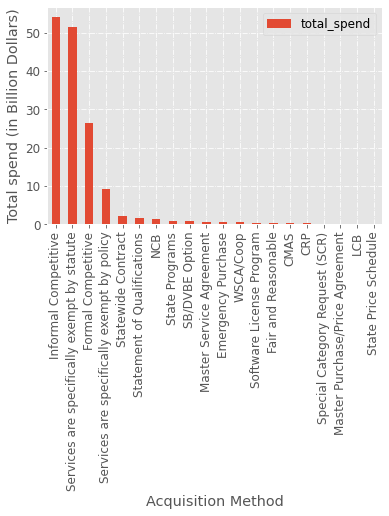

In [16]:
barplot = spend_by_aq_method.plot.bar(x="Acquisition Method", y="total_spend")
barplot.set_ylabel("Total spend (in Billion Dollars)")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
barplot.yaxis.set_major_formatter(ticks_y)

The above plot shows most of the purchases are done under the "Informal Competitive", "Services are specifically exempt by statute", "Formal Competitive", and "Services are specifically exempt by policy" acquisition methods respectively.

However, the plot looks busy and is hard to read. Encoding the acquisition method makes it cleaner.

In [17]:
# Encoding Acquistion Method & Acquistion Type
df["Acquisition Method Encoded"] = df["Acquisition Method"].astype("category")
df["Acquisition Method Encoded"] = df["Acquisition Method Encoded"].cat.codes

df["Acquisition Type Encoded"] = df["Acquisition Type"].astype("category")
df["Acquisition Type Encoded"] = df["Acquisition Type Encoded"].cat.codes

In [18]:
spend_by_aq_method = df.groupby("Acquisition Method Encoded", as_index=False)\
                     .agg(Aq_method=("Acquisition Method", "unique"), 
                          number_of_purchases=("Total Price Numeric", "count"), \
                          avg_spend_per_perchase=("Total Price Numeric", "mean"),\
                          total_spend=("Total Price Numeric", "sum"))\
                     .sort_values("total_spend", ascending=False)

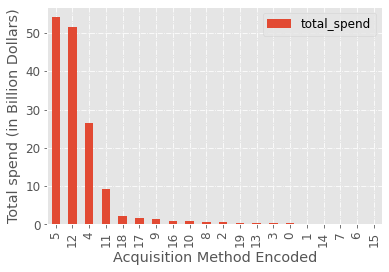

In [19]:
barplot = spend_by_aq_method.plot.bar(x="Acquisition Method Encoded", y="total_spend")
barplot.set_ylabel("Total spend (in Billion Dollars)")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
barplot.yaxis.set_major_formatter(ticks_y)

Other columns that may benefit from label encoding:
- Acquisition Type
- Sub-Acquisition Type
- Sub-Acquisition Method

#### Q3. Are there any obvious outliers or invalid/empty values in the labeled data set?

In [20]:
df.isna().sum()

Creation Date                      0
Purchase Date                  17436
Fiscal Year                        0
LPA Number                    253673
Purchase Order Number              0
Requisition Number            331649
Acquisition Type                   0
Sub-Acquisition Type          277681
Acquisition Method                 0
Sub-Acquisition Method        315122
Department Name                    0
Supplier Code                     36
Supplier Name                     36
Supplier Qualifications       204273
Supplier Zip Code              70110
CalCard                            0
Item Name                         31
Item Description                 200
Quantity                          30
Unit Price                        30
Total Price                       30
Classification Codes            1017
Normalized UNSPSC               1017
Commodity Title                 3295
Class                           3295
Class Title                     3295
Family                          3295
F

Most of the columns have missing values. Most notably, the *Requisition Number* and *Sub-Acquisition Method* columns have 331649 ($95.8\%$ of the rows) and 315122 ($91\%$) missing values

If we label-encode the *Sub-Acquisition Method* Column, there will be $315122$ **invalid** codes with value $-1$

In [44]:
sub_aq_cat = df["Sub-Acquisition Method"].astype("category")
sub_aq_cat.cat.codes.value_counts()


-1     315122
 3      14148
 10     11602
 8       1810
 7        812
 4        565
 12       521
 9        503
 2        334
 0        328
 1        117
 11        83
 13        28
 5         18
 6         15
 15        10
 14         2
dtype: int64

#### Q4. What are the most expensive parts? What is the price distribution?

The top 10 most expensive items are...

In [48]:
top10_expensive = df.loc[df["Unit Price"].notna(), ["Item Name", "Unit Price Numeric"]]\
  .sort_values("Unit Price Numeric", ascending=False).head(10)
top10_expensive["Unit Price Numeric"]=top10_expensive["Unit Price Numeric"].apply(lambda x: f"${x:,}")
top10_expensive

,Item Name,Unit Price Numeric
8790,Personal Service,"$7,337,038,064.0"
304848,04-36069 A10,"$3,194,190,000.0"
292165,Direct Service,"$3,010,052,803.0"
314966,03-76182 A15,"$2,474,118,000.0"
280645,03-76182 A18,"$2,253,227,000.0"
48484,11-10019 A02,"$2,200,000,000.0"
242591,Direct Service,"$1,979,109,000.0"
339157,12-89334,"$1,949,122,000.0"
38396,04-35401 A14,"$1,948,168,000.0"
212412,04-36069 A09,"$1,877,260,000.0"


In [23]:
print(df["Unit Price Numeric"].describe())
print("")
print(df["Total Price Numeric"].describe())

count    3.459880e+05
mean     4.326651e+05
std      2.136461e+07
min     -3.086123e+07
25%      3.468000e+01
50%      5.506650e+02
75%      1.019935e+04
max      7.337038e+09
Name: Unit Price Numeric, dtype: float64

count    3.459880e+05
mean     4.371353e+05
std      2.136468e+07
min     -3.086123e+07
25%      3.000000e+02
50%      3.600000e+03
75%      1.481420e+04
max      7.337038e+09
Name: Total Price Numeric, dtype: float64


Clearly, there are some *invalid* values in the *Unit Price Numeric* & *Total Price Numeric*
columns since prices cannot be negative.

In [24]:
df.loc[df["Total Price Numeric"] < 0].shape

(1438, 35)

It is also easy to see that there are outliers in these columns. The following cells illustrate this point

In [25]:
IQR = df["Total Price Numeric"].quantile(0.75) - df["Total Price Numeric"].quantile(0.25) 
df[df["Total Price Numeric"] > 3*IQR].shape

(45294, 35)

In [26]:
# The maximum Total price is more than 3 times the 99th percentile
df["Total Price Numeric"].max() / df["Total Price Numeric"].quantile(0.99) 

3668.519032

Text(0.5, 0, 'Total Price ($)')

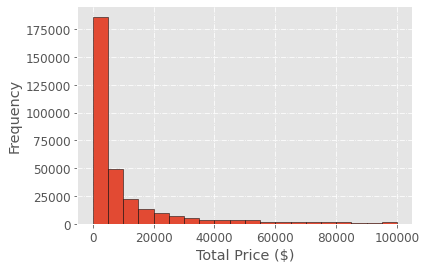

In [27]:
expensive_items = df["Total Price Numeric"] > 1e5 # Roughly 92 percentile
invalid_item_price = df["Total Price Numeric"] < 0
total_price_hist = df.loc[(~expensive_items) & (~invalid_item_price), "Total Price Numeric"].plot(kind="hist", bins=20, ec='black')
total_price_hist.set_xlabel("Total Price ($)")

About half of the purchases are cheaper than $\$5000$ dollars.
And, the total price of about $90\%$ of the purchases is less than $\$100,000$

#### Q5. How has Purchase Order spend been trending over time?

In [28]:
df["Creation Date Format"] = pd.to_datetime(df["Creation Date"])
df["Creation Year-Month"] = pd.to_datetime(df["Creation Date"]).dt.to_period('M')
df["Creation Year-Month"].unique()

<PeriodArray>
['2013-08', '2014-01', '2013-11', '2014-06', '2014-03', '2014-10', '2014-04',
 '2015-02', '2013-06', '2012-10', '2015-06', '2012-07', '2012-09', '2012-11',
 '2014-05', '2013-05', '2013-10', '2013-09', '2012-12', '2013-01', '2013-02',
 '2013-03', '2013-04', '2013-07', '2014-02', '2013-12', '2015-04', '2014-08',
 '2014-07', '2014-12', '2015-03', '2014-09', '2014-11', '2015-01', '2015-05',
 '2012-08']
Length: 36, dtype: period[M]

In [29]:
df["Purchase Date Format"] = pd.to_datetime(df["Purchase Date"], errors="coerce")
df["Purchase Year-Month"] = df["Purchase Date Format"].dt.to_period('M')
df["Purchase Year-Month"].unique()

<PeriodArray>
[    'NaT', '2014-06', '2014-03', '2014-10', '2014-04', '2013-07', '2015-06',
 '2012-08', '2012-10', '2012-11',
 ...
 '2001-02', '2017-05', '2000-04', '2024-08', '2048-09', '2069-10', '2023-06',
 '2001-03', '2017-09', '2021-06']
Length: 266, dtype: period[M]

In [30]:
df.loc[~df["Purchase Year-Month"].isna(), "Purchase Year-Month"].sort_values()

30627     1911-10
16122     1912-03
26764     1912-05
23874     1912-07
214627    1912-07
           ...   
242753    2112-11
286029    2112-11
23985     2112-11
66038     2112-11
63018     2238-02
Name: Purchase Year-Month, Length: 328556, dtype: period[M]

Text(0, 0.5, 'Spend in Billions ($)')

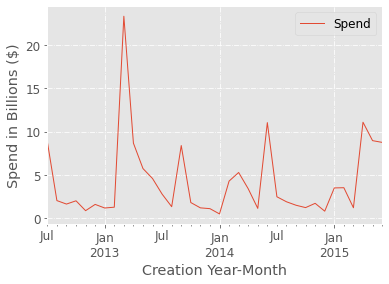

In [31]:
spend_trend = df.groupby("Creation Year-Month", as_index=False).agg(Spend=("Total Price Numeric", "sum"))
spend_plot = spend_trend.plot(x="Creation Year-Month", y="Spend", kind="line")
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
spend_plot.yaxis.set_major_formatter(ticks_y)
spend_plot.set_ylabel("Spend in Billions ($)")

In [32]:
spend_trend.sort_values("Spend").tail()

,Creation Year-Month,Spend
0,2012-07,8.853355e+09
34,2015-05,8.960023e+09
23,2014-06,1.103727e+10
33,2015-04,1.108400e+10
8,2013-03,2.328749e+10


- The spend amount for the Months Jan to March and July seems to be higher for all the fiscal years
- There was also one month (March 2013) in which spending spiked to about $23$ billion dollars.

In [33]:
df[df["Creation Year-Month"] == pd.to_datetime("2013/03").to_period('M')].sort_values("Total Price Numeric").tail()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,Supplier Name,Supplier Qualifications,Supplier Zip Code,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location,Total Price Numeric,Unit Price Numeric,Acquisition Method Encoded,Acquisition Type Encoded,Creation Date Format,Creation Year-Month,Purchase Date Format,Purchase Year-Month
39084,03/11/2013,06/23/2010,2012-2013,NaN,04-36069,NaN,NON-IT Services,Nonprofit Organizations,Informal Competitive,NaN,"Health Care Services, Department of",1087520.0,L.A. Care Health Plan,NaN,90013,NO,04-36069 A07,Amendment A07 extends term and increases budget.,1.0,$1593616000.00,$1593616000.00,85101705,85101705.0,Public health administration,85101700.0,Health administration services,85100000.0,Comprehensive health services,85000000.0,Healthcare Services,"90013\n(34.04469, -118.241599)",1.593616e+09,1.593616e+09,5,4,2013-03-11,2013-03,2010-06-23,2010-06
39096,03/11/2013,06/23/2010,2012-2013,NaN,04-36069,NaN,NON-IT Services,Nonprofit Organizations,Informal Competitive,NaN,"Health Care Services, Department of",1087520.0,L.A. Care Health Plan,NaN,90013,NO,04-36069 A09a,Amendment 9a Incorporates SB 90 Quality Assura...,1.0,$1785106000.00,$1785106000.00,85101705,85101705.0,Public health administration,85101700.0,Health administration services,85100000.0,Comprehensive health services,85000000.0,Healthcare Services,"90013\n(34.04469, -118.241599)",1.785106e+09,1.785106e+09,5,4,2013-03-11,2013-03,2010-06-23,2010-06
212412,03/11/2013,06/23/2010,2012-2013,NaN,04-36069,NaN,NON-IT Services,Nonprofit Organizations,Informal Competitive,NaN,"Health Care Services, Department of",1087520.0,L.A. Care Health Plan,NaN,90013,NO,04-36069 A09,Amendment A09 extends term.,1.0,$1877260000.00,$1877260000.00,85101705,85101705.0,Public health administration,85101700.0,Health administration services,85100000.0,Comprehensive health services,85000000.0,Healthcare Services,"90013\n(34.04469, -118.241599)",1.877260e+09,1.877260e+09,5,4,2013-03-11,2013-03,2010-06-23,2010-06
38396,03/27/2013,07/01/2004,2012-2013,NaN,04-35401,NaN,NON-IT Services,Services are specifically exempt by statute,Informal Competitive,NaN,"Health Care Services, Department of",1030158.0,Health Plan of San Joaquin,NaN,95231,NO,04-35401 A14,Amendment A14 Funding adj.\n Adding Sta...,1.0,$1948168000.00,$1948168000.00,85101705,85101705.0,Public health administration,85101700.0,Health administration services,85100000.0,Comprehensive health services,85000000.0,Healthcare Services,"95231\n(37.878707, -121.287553)",1.948168e+09,1.948168e+09,5,4,2013-03-27,2013-03,2004-07-01,2004-07
304848,03/11/2013,06/23/2010,2012-2013,NaN,04-36069,NaN,NON-IT Services,Nonprofit Organizations,Informal Competitive,NaN,"Health Care Services, Department of",1087520.0,L.A. Care Health Plan,NaN,90013,NO,04-36069 A10,Amendment A10 adjusts funding and extends term.,1.0,$3194190000.00,$3194190000.00,85101705,85101705.0,Public health administration,85101700.0,Health administration services,85100000.0,Comprehensive health services,85000000.0,Healthcare Services,"90013\n(34.04469, -118.241599)",3.194190e+09,3.194190e+09,5,4,2013-03-11,2013-03,2010-06-23,2010-06


In [34]:
unequal_dates = df["Creation Date Format"].dt.year != df["Purchase Date Format"].dt.year
not_null_dates = df["Purchase Date"].notna()
df.loc[(not_null_dates) & (unequal_dates), ["Creation Year-Month", "Total Price Numeric"]]\
    .groupby("Creation Year-Month").sum().sort_values("Total Price Numeric", ascending=False)

,Total Price Numeric
Creation Year-Month,
2013-03,2.247873e+10
2014-06,1.004526e+10
2015-04,9.937736e+09
2013-04,8.289894e+09
2015-05,7.661887e+09
2015-06,4.708679e+09
2014-03,4.395927e+09
2014-02,3.801599e+09
2013-06,3.789394e+09


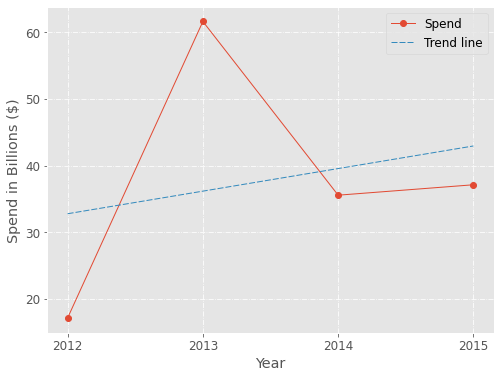

In [37]:
df["Creation Year"] = pd.to_datetime(df["Creation Date"]).dt.to_period('Y')
valid_price = df["Total Price Numeric"] >= 0

spend_trend = df[valid_price].groupby("Creation Year", as_index=False).agg(Spend=("Total Price Numeric", "sum"))
years = spend_trend["Creation Year"].apply(lambda x: x.year)
m,b = np.polyfit(years, spend_trend["Spend"], 1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# spend_plot = spend_trend.plot(x="Creation Year", y="Spend", kind="line", marker="o",dashes=[6, 2])
ax.plot(years, spend_trend["Spend"],'-o', label="Spend")
ax.plot(years, m*years + b, dashes=[6,2], label="Trend line")

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, _: f'{x/scale_y:g}')
ax.yaxis.set_major_formatter(ticks_y)
ax.locator_params(integer=True)
ax.set_xlabel("Year")
ax.set_ylabel("Spend in Billions ($)")
ax.legend();

In general, the spending trend over the years has been growing. 
The spike in 2013 is the result of a few high-dollar spends whose actual purchase date backdates the creation date.

#### Q6. Which departments are spending the most money?

About $66\%$ of the spending comes from the Department of Health Care Services.
Departments of Public Health and Social Services are distant second and third, 
each of them spending about $3.7\%$ of the total.

The top 10 departments by spend are...

In [38]:
spend_per_dept = df.groupby("Department Name", as_index=False).agg(num_of_purchases=("Total Price Numeric","count"), total_spend=("Total Price Numeric","sum")).sort_values("total_spend", ascending=False)
spend_per_dept["pct_of_total"] = spend_per_dept["total_spend"].apply(lambda x: round(100 *(x/spend_per_dept["total_spend"].sum()),2))
spend_per_dept.head(10)

,Department Name,num_of_purchases,total_spend,pct_of_total
56,"Health Care Services, Department of",2862,9.975935e+10,65.96
81,"Public Health, Department of",4091,5.621708e+09,3.72
92,"Social Services, Department of",2323,5.565328e+09,3.68
31,"Corrections and Rehabilitation, Department of",57537,4.711857e+09,3.12
93,"State Hospitals, Department of",18968,4.545650e+09,3.01
105,"Transportation, Department of",17644,4.347883e+09,2.87
57,"High Speed Rail Authority, California",489,3.565362e+09,2.36
110,"Water Resources, Department of",28331,2.790266e+09,1.84
30,Correctional Health Care Services,32220,2.641174e+09,1.75
38,Employment Development Department,3412,1.724961e+09,1.14


#### Q7. Which zip code has the most supplier concentration? Any idea why?

Zip Code 95691 has the most supplier concentration with around $4\%$ of the purchases originating from that zip code.

In [39]:
supplier_count = df["Supplier Zip Code"].value_counts()
supplier_count

95691         11095
95814         10921
95696          8518
95827          7159
95841          7008
              ...  
53141-1410        1
11201             1
2134              1
91386             1
55044             1
Name: Supplier Zip Code, Length: 3993, dtype: int64

In [40]:
supplier_count.apply(lambda x: 100*(x/supplier_count.sum()))

95691         4.021268
95814         3.958203
95696         3.087261
95827         2.594705
95841         2.539977
                ...   
53141-1410    0.000362
11201         0.000362
2134          0.000362
91386         0.000362
55044         0.000362
Name: Supplier Zip Code, Length: 3993, dtype: float64

Which suppliers are located in zip code 95691?

In [41]:
df.loc[df["Supplier Zip Code"] == '95691', "Supplier Name"].value_counts()

Grainger Industrial Supply                   9441
MMG Technology Group Inc                      310
Paper Distributors Inc                        219
NOR CAL PERFORMANCE                           135
ANCHOR SUPPLY                                 105
                                             ... 
AFM ENVIRONMENTAL, INC                          1
Michael Palmer                                  1
Kutsch, Inc. dba: B&R Head & Block Repair       1
KEVCO, INC.                                     1
Graebel                                         1
Name: Supplier Name, Length: 93, dtype: int64

In [42]:
df.loc[df["Supplier Name"] == "Grainger Industrial Supply", "Acquisition Method"].value_counts()

WSCA/Coop                                     9267
Informal Competitive                           105
Fair and Reasonable                             62
SB/DVBE Option                                   2
Formal Competitive                               2
State Programs                                   1
Services are specifically exempt by policy       1
NCB                                              1
Name: Acquisition Method, dtype: int64

- Out of 11095 purchases made from suppliers in zip code 95691, 9441 (about 85%)
of the purchases are made from *Grainger Industrial Supply*

- 9267 (more than 98%) of the purchases from *Grainger Industrial Supply* are 
made using the *WSCA/Coop* Acquisition Method.

#### Q8. What are the top UNSPSC categories? (i.e. 2nd level "Family" UNSPSC categories)

In [43]:
df.groupby("Family Title", as_index=False)\
    .agg(count=("Family Title", "count"), total_spend=("Total Price Numeric", "sum"))\
    .sort_values(["count", "total_spend"], ascending=False)

,Family Title,count,total_spend
265,Office machines and their supplies and accesso...,16479,8.894055e+07
150,Fuels,14599,2.885348e+08
59,Computer services,13946,1.547036e+09
58,Computer Equipment and Accessories,13851,2.738105e+08
285,Paper products,10772,1.176002e+08
...,...,...,...
117,Fabricated sheet assemblies,1,1.731250e+04
114,Extrusions,1,1.060400e+04
207,Live chrysanthemums,1,6.342000e+03
216,Machined extrusions,1,2.586000e+01


#### Q9. Can you prepare a visual for one of the above quantifications you think may be better represented visually?

#### Q10. If you could spend another day cleaning up the data to make it more useful what might you do?

#### Q11. If you could find another data set that would complement this one to help answer the above or similar questions, what dataset might be ideal?

# Limitations, Assumptions & Questions

Question1: Couldn't figure out which column corresponds to "2nd level "Family" UNSPSC categories" for the 8th question. Currently I am assuming it refers to the "Family Title"
column. Is that OK or have I misunderstood the question?